In [184]:
import re
import pandas as pd # CSV file I/O (pd.read_csv)
from nltk.corpus import stopwords
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix
from sklearn.model_selection import train_test_split

import nltk
from sklearn.feature_extraction.text import CountVectorizer

In [185]:
news = pd.read_excel("C:\\Users\\Kratika\\Downloads\\News data (Completed) (1) (9).xlsx")

In [186]:
import re

def clean(Body):
    words = [",", ".", "-", "/", "alert", 
             "on","for", "from", "to", "of", "any","in", "into","since", "as",
             "the", "a", "an", "these","there",
             "new", "or", "and", 
             "me", "i", "he", "his","she", "her" ,"him", "us","we", "our", "they", "their","you", "your","it",
             "i'm", "he's", "we'r", "our's", "your's","it's","its",
             "is" ,"am", "are", "have", "has", "does","were","was","will","be" ,"been","shall" ,"had",
             "when", "where", "what","companies","company"]

    clean_cat = Body.lower()
    for word in words:
        clean_cat = re.sub(r"[\s.,]"+word+"[\s.,]", ' ', clean_cat)
    return clean_cat.strip()
    

In [187]:
news['clean_Body'] = news['Body'].apply(clean) 
 
news.head(5)

,Title,Body,Category,clean_Body
0,Adani Ports Shares Jump Nearly 6% as Buyback O...,"August 26, 2019, 4:25 PM IST\nFor Representati...",Buyback of shares - Alert me when any of these...,"august 26, 2019, 4:25 pm ist representation\nl..."
1,Adani Ports buyback to open on September 6; sh...,Adani Ports and Special Economic Zone\ngained ...,Buyback of shares - Alert me when any of these...,adani ports special economic zone\ngained 7 pe...
2,Adani Ports Q1 net profit jumps 47.50%,Adani Ports and Special Economic Zone (APSEZ) ...,"Earnings, Stock Performance or Dividends - Ale...",adani ports special economic zone (apsez) wedn...
3,Adani Ports keen on building port at Nagarjuna...,Adani Ports and Special Economic Zone Ltd (APS...,New Geography - Alert me when a company moves ...,adani ports special economic zone ltd (apsez) ...
4,Adani Ports Q1 result: Adani Ports Q1 PAT jump...,Adani Ports\non Wednesday said its consolidate...,"Earnings, Stock Performance or Dividends - Ale...",adani ports wednesday said consolidated net pr...


In [188]:
#from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

def remove_stop_words(data):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(data) 
    filtered_sentence = []
    
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    return " ".join(filtered_sentence)

In [189]:
remove_stop_words_Body = news['Body'].apply(remove_stop_words) 
#remove_stop_words_Body

In [166]:

body_tr, body_te, category_tr, category_te = train_test_split(remove_stop_words_Body,news.Category, test_size =.06)
# body_tr, body_de, category_tr, category_de = train_test_split(body_tr,category_tr,test_size =.010)
print("Training: ",len(body_tr))
# print("Developement: ",len(body_de),)
print("Testing: ",len(body_te))

Training:  2347
Testing:  150


In [167]:
#pip install wordcloud

In [168]:
from wordcloud import WordCloud
text = " ".join(body_tr)
wordcloud = WordCloud().generate(text)
plt.figure()
plt.subplots(figsize=(20,12))
wordcloud = WordCloud(
    background_color="white",
    max_words=len(text),
    max_font_size=40,
    relative_scaling=.5).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [190]:
# Data Preprocessing
# Vectorization of data
# Vectorize the data using Bag of words (BOW)


tokenizer = nltk.tokenize.RegexpTokenizer(r"\w+")
stop_words = nltk.corpus.stopwords.words("english")
vectorizer = CountVectorizer(tokenizer=tokenizer.tokenize, stop_words=stop_words)




In [191]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold

vectorizer.fit(iter(body_tr))
Xtr = vectorizer.transform(iter(body_tr))
#Xde = vectorizer.transform(iter(body_de))
Xte = vectorizer.transform(iter(body_te))



In [192]:
encoder = LabelEncoder()
encoder.fit(category_tr)
Ytr = encoder.transform(category_tr)
#Yde = encoder.transform(category_de)
Yte = encoder.transform(category_te)

In [193]:
Yte

array([37, 37, 31, 59, 59, 10, 42,  7, 59, 32, 59, 59, 59, 50, 42,  0, 49,
       44, 59, 61, 32, 10, 10, 59, 59, 16, 40, 59, 31, 61, 46, 54, 37, 59,
       17, 40, 59, 32, 60, 54, 10,  2, 30, 42, 59, 20, 10, 59, 49, 59, 20,
       47, 42, 59, 59, 49,  9, 35, 42, 50, 59, 42, 59, 31, 50, 59, 46, 50,
       26, 59, 37, 24, 61, 42, 59, 59, 59, 54, 59, 42, 47, 17, 39, 10, 10,
       59, 37, 42, 61, 59, 42, 59, 59, 59, 59, 59, 20, 10, 59, 32,  9, 59,
       59, 10, 24, 42, 59, 32, 59, 59, 40, 59, 59, 59, 49, 47, 42, 59, 61,
       32, 29, 59, 10, 59, 24, 31, 37, 10, 26, 51, 10, 20, 26, 59, 61, 32,
       42, 59, 59, 59, 10, 13, 10, 31, 37, 59, 59, 16, 46, 59])

In [194]:
## Feature Reduction
import copy

print("Number of features before reduction : ", Xtr.shape[1])
selection = VarianceThreshold(threshold=0.001)
Xtr_whole = copy.deepcopy(Xtr)
Ytr_whole = copy.deepcopy(Ytr)
selection.fit(Xtr)
Xtr = selection.transform(Xtr)
#Xde = selection.transform(Xde)
Xte = selection.transform(Xte)
print("Number of features after reduction : ", Xtr.shape[1])

Number of features before reduction :  16468
Number of features after reduction :  7318


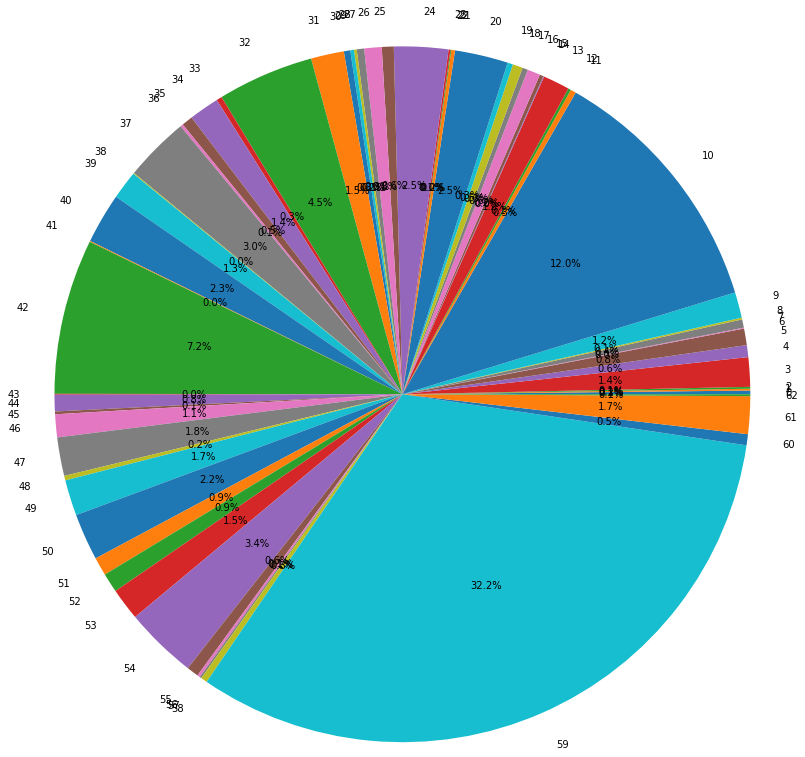

In [195]:
## Sampling data
import matplotlib.pyplot as plt

labels = list(set(Ytr))
counts = []
for label in labels:
    counts.append(np.count_nonzero(Ytr == label))
plt.pie(counts, labels=labels, autopct='%1.1f%%', radius=4)
plt.show()


In [196]:
## As we can see the class labels are not uniformy distributed 
## so we will use SMOT and oversample the classes which are less in number so that classes are equally distributed


In [201]:
len(set(pred)),len(set(Yte))

(37, 30)

In [206]:
print(classification_report(Yte, pred, target_names=encoder.classes_))

ValueError: Number of classes, 43, does not match size of target_names, 63. Try specifying the labels parameter

In [200]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(Xtr, Ytr)
pred = dt.predict(Xte)
print(classification_report(Yte, pred, target_names=encoder.classes_))


ValueError: Number of classes, 43, does not match size of target_names, 63. Try specifying the labels parameter

In [82]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=40)
rf.fit(Xtr, Ytr)
pred = rf.predict(Xte)
print(classification_report(Yte, pred, target_names=encoder.classes_))

ValueError: Number of classes, 13, does not match size of target_names, 63. Try specifying the labels parameter

In [60]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(Xtr, Ytr)
pred = nb.predict(Xde)
print(classification_report(Yde, pred, target_names=encoder.classes_))

ValueError: Number of classes, 14, does not match size of target_names, 63. Try specifying the labels parameter

In [84]:
reverse_vocabulary = {}
vocabulary = vectorizer.vocabulary_
for word in vocabulary:
    index = vocabulary[word]
    reverse_vocabulary[index] = word

vector = vectorizer.transform(iter(['Nasa scientists are good']))
indexes = vector.indices
for i in indexes:
    print (reverse_vocabulary[i])

good
nasa
scientists


In [85]:
nb1 = MultinomialNB()
nb1.fit(Xtr_whole, Ytr_whole)
coefs = nb1.coef_
target_names = encoder.classes_

for i in range(len(target_names)):
    words = []
    for j in coefs[i].argsort()[-20:]:
        words.append(reverse_vocabulary[j])
    print (target_names[i], '-', words, "\n")


Annual Report - Comments made in the Annual Report - ['100', 'bru', '2019bajaj', 'pennant', '20181', '20', 'venues', 'incidents', 'reopened', 'produce', '2w', 'anniversary', 'tony', 'amitava', 'fina', 'tap', 'comp', 'xporter', 'criticare', 'router'] 

Approval - Alert me when a company gets an approval - ['session', 'pecking', 'independent', 'husband', 'xporter', 'steps', 'kyocera', 'affan', 'georgia', 'premiere', 'bollinger', 'petroleum', 'anjali', 'metalminer', 'syllabus', 'cincinnati', 'drivers', 'apprenticeship', 'metric', 'urbanite'] 

Award Received- Alert me when any of these companies receives an award - ['staples', 'awaiting', 'spirit', 'anjali', 'awa', 'challenge', 'tanker', 'automaker', 'denied', 'telecommunication', 'task', 'arbitration', 'burmah', 'switching', 'devesh', '5m', 'softness', '2019bajaj', 'sept', 'difference'] 

Black Swan Events - Alert me when a company faces an exceptional loss - ['2019bajaj', 'mood', 'thinking', 'pending', 'naturally', 'troubles', 'pocket',

Research House - Aalert me when a research house comments on the company - ['tony', 'broadcasting', '2019bajaj', '4mtpa', 'garage', 'burmah', 'cellular', 'grounds', 'retreating', 'lowered', 'indem', '100', 'steps', '20', 'pennant', 'prestigious', 'talks', 'sagittarius', 'critically', 'router'] 

Sales Drop - Alert me when any of these companies see a drop in their sales figure - ['turns', '20', 'authorisation', 'varies', 'juarez', '100', 'tony', 'sacrificed', 'comp', 'sochi', 'doj', '2019bajaj', 'moneytapa', 'lapse', 'xporter', 'cellular', 'pennant', 'aug', 'sagittarius', 'unfair'] 

Sales or User Growth - Alert me when the average sales or user volume for a company increases - ['mhals', 'pixel', 'margrethe', 'berry', 'cellular', 'keith', 'francs', 'lewis', 'pennant', 'proclaims', 'turns', 'ubers', 'new', 'logs', 'networks', 'pretty', 'grounds', 'seek', 'sacrificed', 'comp'] 

Stake Increase/Decrease - Alert me when  a company's major shareholder changes it's stake (increase or decreas